In [1]:
! kaggle

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 6, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [0]:
! cp kaggle.json /root/.kaggle/kaggle.json

In [0]:
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
! kaggle datasets download ellenyusa/4classimages


 62% 12.0M/19.2M [00:00<00:00, 123MB/s]
100% 19.2M/19.2M [00:00<00:00, 123MB/s]


In [5]:
! unzip 4classimages.zip


Archive:  4classimages.zip
   creating: data/
   creating: data/cats/
  inflating: data/cats/cat.1.jpg     
  inflating: data/cats/cat.10.jpg    
  inflating: data/cats/cat.100.jpg   
  inflating: data/cats/cat.101.jpg   
  inflating: data/cats/cat.102.jpg   
  inflating: data/cats/cat.103.jpg   
  inflating: data/cats/cat.104.jpg   
  inflating: data/cats/cat.105.jpg   
  inflating: data/cats/cat.106.jpg   
  inflating: data/cats/cat.107.jpg   
  inflating: data/cats/cat.108.jpg   
  inflating: data/cats/cat.109.jpg   
  inflating: data/cats/cat.11.jpg    
  inflating: data/cats/cat.110.jpg   
  inflating: data/cats/cat.111.jpg   
  inflating: data/cats/cat.112.jpg   
  inflating: data/cats/cat.113.jpg   
  inflating: data/cats/cat.114.jpg   
  inflating: data/cats/cat.115.jpg   
  inflating: data/cats/cat.116.jpg   
  inflating: data/cats/cat.117.jpg   
  inflating: data/cats/cat.118.jpg   
  inflating: data/cats/cat.119.jpg   
  inflating: data/cats/cat.12.jpg    
  inflating: data/

In [6]:
import pandas as pd
from keras.models import Model
from keras.layers import Dense, Input, Conv2D, MaxPool2D, Flatten, Dropout
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [0]:
model = ResNet50()

In [0]:
combined = model.layers

In [0]:
combined

In [0]:
for layer in combined:
  layer.trainable = False

In [0]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_8[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [0]:
generator = ImageDataGenerator()

In [0]:
gen = generator.flow_from_directory("data/",batch_size=32,target_size=(224,224))

Found 808 images belonging to 4 classes.


In [0]:
images, values = gen.next()

In [0]:
values

array([[0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


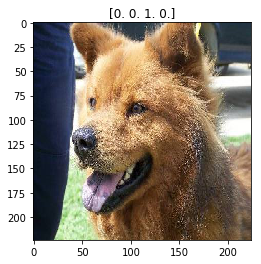

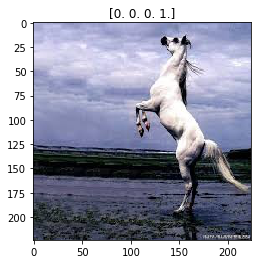

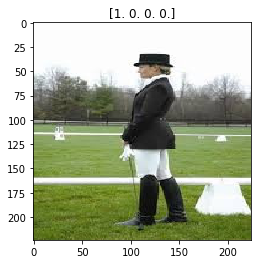

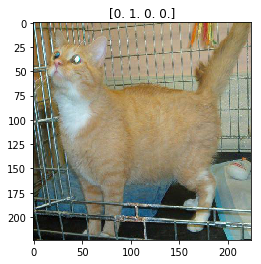

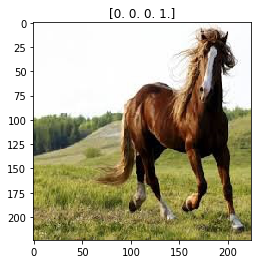

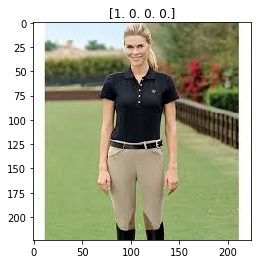

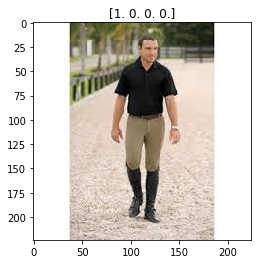

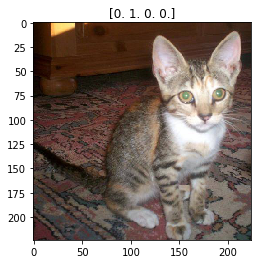

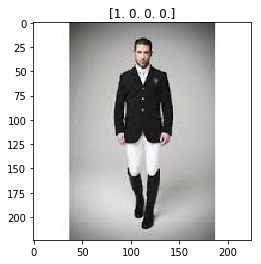

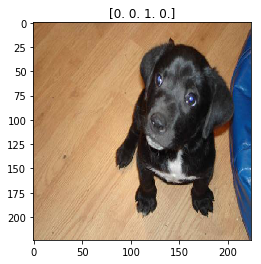

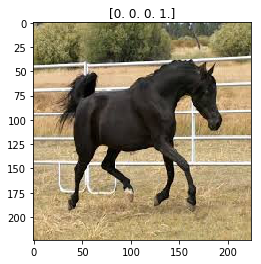

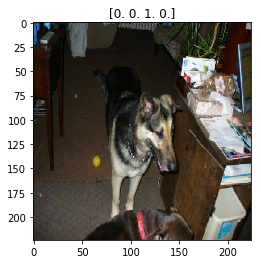

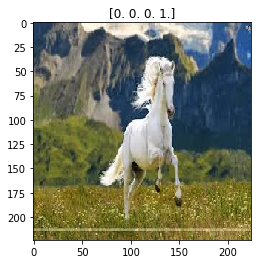

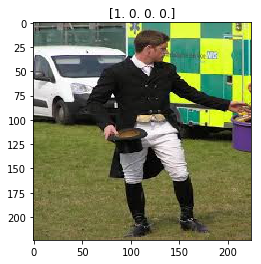

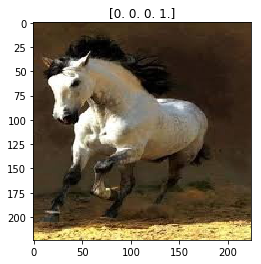

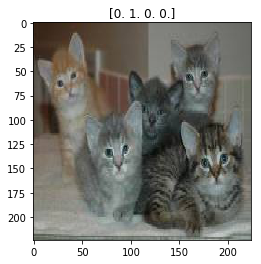

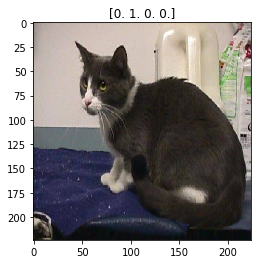

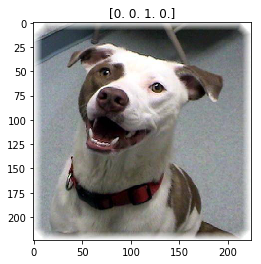

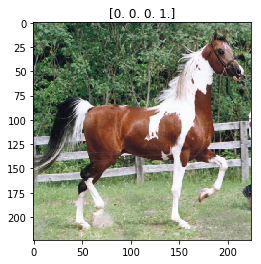

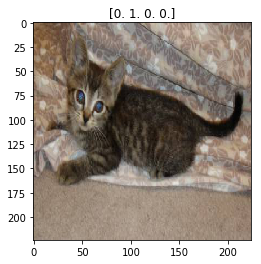

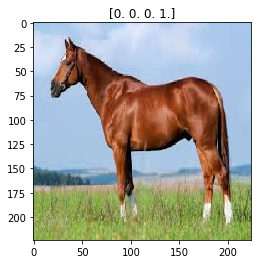

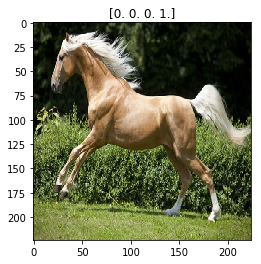

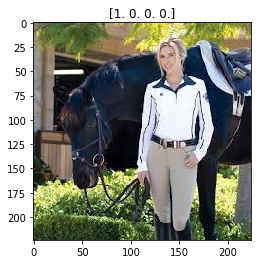

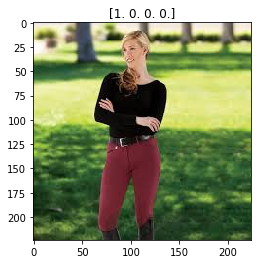

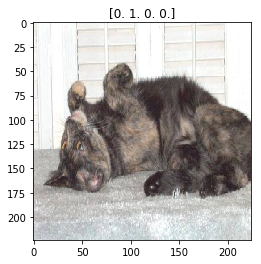

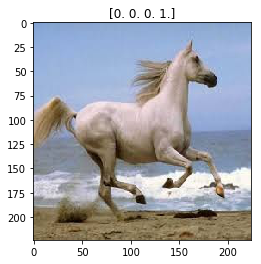

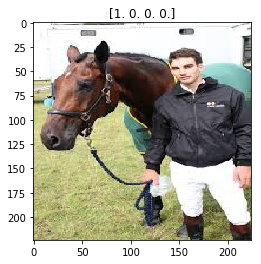

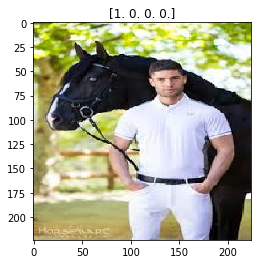

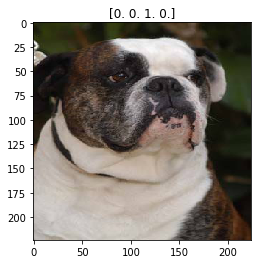

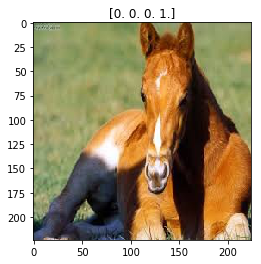

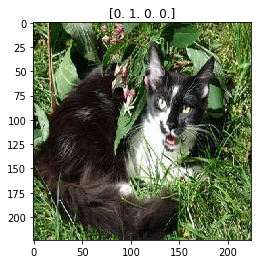

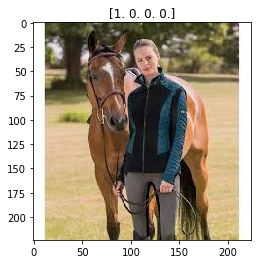

In [0]:
for image, val in zip(images,values):
   
    
    plt.figure()
    plt.imshow(image/255,cmap="gray") 
    plt.title(str(val))

In [0]:
images.shape

(32, 224, 224, 3)

In [0]:
De1=Dense(1000,activation="tanh")(combined[-1].output)
De2=Dense(600,activation="tanh")(De1)
De3=Dense(300,activation="tanh")(De2)


eout=Dense(4,activation="softmax")(De3)

In [0]:
m1 = Model(inputs = [combined[0].input], outputs = [eout] )

In [0]:
m1.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [0]:
gen


In [0]:
images.shape

(32, 224, 224, 3)

In [0]:
gen.class_indices

{'Humans': 0, 'cats': 1, 'dogs': 2, 'horses': 3}

In [0]:
m1.fit_generator(gen,epochs=6,steps_per_epoch=2)

Epoch 1/6
2/2 [==============================] - 20s 10s/step - loss: 1.3922 - acc: 0.1313
Epoch 2/6
2/2 [==============================] - 16s 8s/step - loss: 1.3029 - acc: 0.4531
Epoch 3/6
2/2 [==============================] - 16s 8s/step - loss: 1.2341 - acc: 0.4688
Epoch 4/6
2/2 [==============================] - 16s 8s/step - loss: 1.0557 - acc: 0.7188
Epoch 5/6
2/2 [==============================] - 16s 8s/step - loss: 0.9468 - acc: 0.6719
Epoch 6/6
2/2 [==============================] - 16s 8s/step - loss: 0.6639 - acc: 0.8438


In [0]:
np.argmax(m1.predict(images,batch_size=32),axis=1)

array([2, 3, 0, 1, 3, 0, 0, 1, 0, 2, 2, 2, 3, 0, 3, 1, 1, 2, 3, 1, 3, 3,
       0, 0, 2, 3, 0, 0, 2, 2, 1, 0])

In [0]:
m1.evaluate(images,values)

32/32 [==============================] - 13s 408ms/step


[0.41093379259109497, 0.90625]

In [0]:
import cv2
one = cv2.imread("data/cats/cat.1.jpg")
# gray = cv2.cvtColor(one, cv2.COLOR_BGR2GRAY)
# print(gray.shape)
# small = cv2.resize(gray, (224, 224))
# print(small.shape)
# small = (small < 100).astype(int) * 255
# print(small)
# small = small.reshape(224,224,3)

# # print(np.argsort(m1.predict(np.array([small.reshape(224,224,3)]))))

# # plt.imshow(small)

In [0]:
one.shape

(280, 300, 3)

In [0]:
one = one.reshape(1,224,224,3).astype(int)

ValueError: ignored

In [0]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
img1 = image.load_img("paint-horse-running-in-field.jpg",target_size=(224,224,3))

In [0]:
np_img = image.img_to_array(img1)

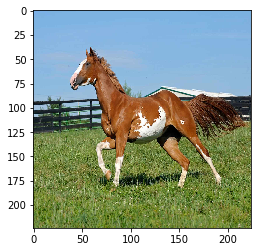

In [0]:
plt.imshow(np_img/255)

In [0]:
images[0].shape

(224, 224, 3)

In [0]:
np_img

array([[[123., 176., 230.],
        [123., 176., 230.],
        [123., 176., 230.],
        ...,
        [123., 177., 224.],
        [123., 177., 224.],
        [123., 177., 224.]],

       [[123., 176., 230.],
        [123., 176., 230.],
        [123., 176., 230.],
        ...,
        [123., 177., 224.],
        [123., 177., 224.],
        [123., 177., 224.]],

       [[123., 176., 230.],
        [123., 176., 230.],
        [123., 176., 230.],
        ...,
        [123., 177., 224.],
        [123., 177., 224.],
        [123., 177., 224.]],

       ...,

       [[ 99., 125.,  51.],
        [106., 123.,  52.],
        [117., 146.,  80.],
        ...,
        [115., 139.,  55.],
        [ 61.,  83.,  19.],
        [126., 135.,  70.]],

       [[100., 126.,  39.],
        [ 91., 118.,  47.],
        [122., 150.,  92.],
        ...,
        [106., 136.,  36.],
        [139., 160.,  91.],
        [151., 157.,  93.]],

       [[ 99., 128.,  44.],
        [ 88., 119.,  51.],
        [111., 1

In [0]:
np_img = np_img.reshape(1,224,224,3).astype(int)

In [0]:
np.argmax(m1.predict(np_img))

3

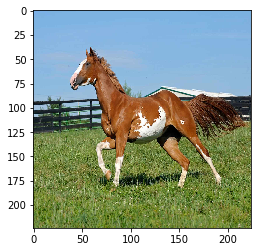

In [0]:
plt.imshow(np_img.reshape(224,224,3).astype(int))